# 연습문제 (3) - 분산분석

## 필요한 패키지 설치

In [13]:
from pandas import read_excel, melt, concat
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os
from scipy.stats import f_oneway

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import all_test

## 문제1

독서방법(X)에 따른 점수(Y)의 차이

귀무가설 : 독서방법 간 점수의 차이가 없다.

대립가설 : 독서방법 간 점수의 차이가 있다. 

In [6]:
# 데이터 불러오기
df1 = read_excel("https://data.hossam.kr/E02/reading.xlsx")
df1

,독서방법,점수
0,B,6
1,B,9
2,B,2
3,B,16
4,D,7
5,D,7
6,D,12
7,D,10
8,D,16
9,S,11


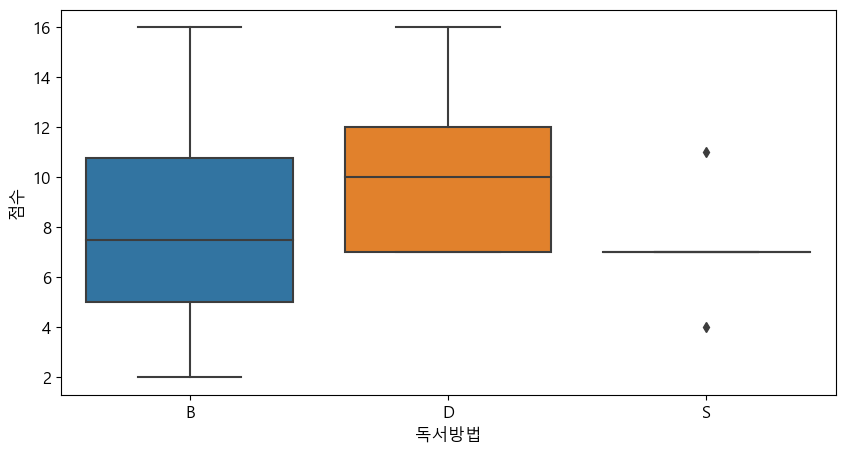

In [7]:
# 탐색적 데이터 분석 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
sb.boxplot(data=df1, x='독서방법', y='점수')
plt.show()
plt.close()

- 표본(B,D,S) 간 데이터 분포가 크지 않다 = 표본 간의 차이가 없다.

In [8]:
df1['독서방법'] = df1['독서방법'].astype('category')
df1.dtypes

독서방법    category
점수         int64
dtype: object

In [19]:
# 추론적 데이터 분석 - 가설검정
lm = ols('점수 ~ C(독서방법)', data=df1).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(독서방법),2.0,26.464286,13.232143,0.779403,0.48244
Residual,11.0,186.750000,16.977273,NaN,NaN


- 결과해석 : 0.482이므로 0.05보다 크기때문에 귀무가설을 기각할 수 없다. 즉, 독서방법은 점수에 유의미한 영향을 미치지 않는다.

**********

## 문제2

효소 함량(X)에 따라 토마토 모종 성장(Y)의 차이

귀무가설 : 효소함량에 따라 토마토 모종 성장에 차이가 없다.

대립가설 : 효소함량에 따라 토마토 모종 성장에 차이가 있다.

## 나

In [5]:
# 데이터 불러오기
df2 = read_excel("https://data.hossam.kr/E02/tomato.xlsx")
df2

,효소함량,모종성장
0,0,10.8
1,0,9.1
2,0,13.5
3,0,9.2
4,1000,11.1
5,1000,11.2
6,1000,8.2
7,1000,11.3
8,5000,5.4
9,5000,4.6


In [12]:
# 데이터 전처리
df2['효소함량'] = df2['효소함량'].astype('category')
df2.dtypes

효소함량    category
모종성장     float64
dtype: object

In [13]:
# 일원분산분석
lm = ols('모종성장 ~ C(효소함량)', data=df2).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(효소함량),3.0,101.1275,33.709167,12.085748,0.000615
Residual,12.0,33.4700,2.789167,NaN,NaN


- 결과해석 : 0.000615이므로 0.05보다 낮아 귀무가설 기각 -> 효소함량에 따라 모종성장에 차이가 있다.

## 선생님 풀이

In [6]:
# 데이터 라벨링(1부터 해야한다.!!)
df2['효소함량'] = df2['효소함량'].map({0:1, 1000:2, 5000:3 , 10000:4}) 
df2

,효소함량,모종성장
0,1,10.8
1,1,9.1
2,1,13.5
3,1,9.2
4,2,11.1
5,2,11.2
6,2,8.2
7,2,11.3
8,3,5.4
9,3,4.6


In [8]:
formula = '모종성장 ~C(효소함량)'
lm = ols(formula, df2).fit()
anova = anova_lm(lm)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(효소함량),3.0,101.1275,33.709167,12.085748,0.000615
Residual,12.0,33.4700,2.789167,NaN,NaN


*************

## 문제3

두가지 교육 방법(X:1,2)에 대한 국어와 영어의 효과(Y)의 차이

귀무가설 : 교육방법에 따라 국어와 영어의 효과는 차이가 없다.

대립가설 : 교육방법에 따라 국어와 영어의 효과는 차이가 있다.


## 나

In [9]:
#데이터 불러오기
df3 = read_excel("https://data.hossam.kr/E02/edu.xlsx")
df3

,교육방법,국어,영어
0,1,65,82
1,1,87,79
2,1,73,85
3,1,79,60
4,1,81,65
5,1,69,70
6,1,55,79
7,1,76,80
8,1,77,76
9,1,70,90


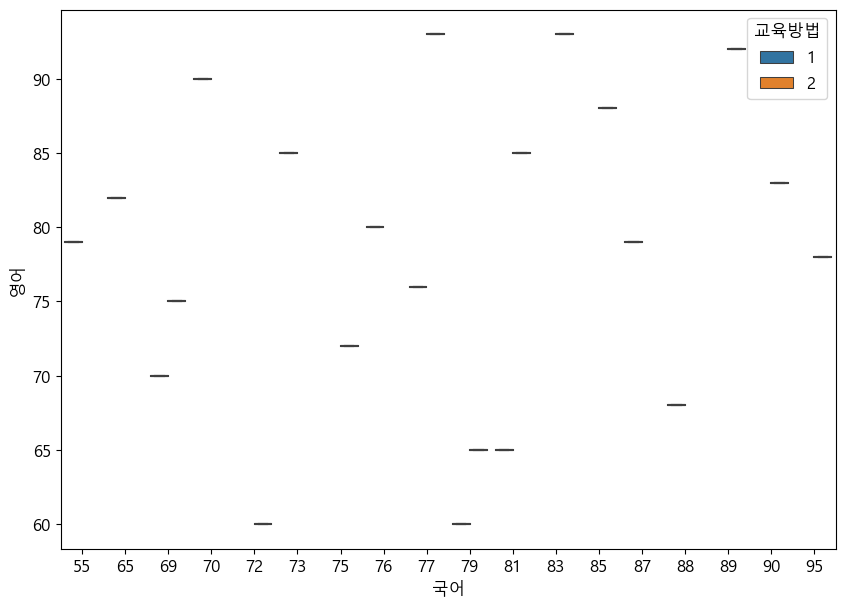

In [20]:
# 탐색적 데이터 분석
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
sb.boxplot(data=df3, x='국어', y='영어', hue='교육방법')
plt.show()
plt.close()

- 데이터 분포가 넓다. 

In [30]:
df3['교육방법'] = df3['교육방법'].astype('category')
df3.dtypes

교육방법    category
국어         int64
영어         int64
dtype: object

In [34]:
df4 = melt(df3, id_vars=['교육방법'], value_vars=['국어','영어'])
df4

,교육방법,variable,value
0,1,국어,65
1,1,국어,87
2,1,국어,73
3,1,국어,79
4,1,국어,81
5,1,국어,69
6,1,국어,55
7,1,국어,76
8,1,국어,77
9,1,국어,70


In [36]:
df4['variable'] = df4['variable'].map({'국어':0, '영어':1})

In [37]:
df4

,교육방법,variable,value
0,1,0,65
1,1,0,87
2,1,0,73
3,1,0,79
4,1,0,81
5,1,0,69
6,1,0,55
7,1,0,76
8,1,0,77
9,1,0,70


In [38]:
model = ols('value ~ C(교육방법) ', data=df4).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(교육방법),1.0,355.113636,355.113636,4.022471,0.051368
Residual,42.0,3707.863636,88.282468,NaN,NaN


- 결과해석 : 0.0513이므로 0.05보다 크므로 귀무가설을 기각할 수 없다. 교육방법에 따라 국어와 영어의 점수차이가 없다. 

## 선생님 풀이

In [10]:
df4 = df3.filter(['교육방법', '국어'])
df4.rename(columns={'국어':'점수'}, inplace=True)
df4['과목'] = '국어'

In [11]:
df5 = df3.filter(['교육방법', '영어'])
df5.rename(columns={'영어':'점수'}, inplace=True)
df5['과목'] = '영어'

In [16]:
df6=concat([df4, df5])
df6

,교육방법,점수,과목
0,1,65,국어
1,1,87,국어
2,1,73,국어
3,1,79,국어
4,1,81,국어
5,1,69,국어
6,1,55,국어
7,1,76,국어
8,1,77,국어
9,1,70,국어


In [18]:
# 데이터 라벨링
df6['과목']=df6['과목'].map({'국어':1, '영어':2})
df6

,교육방법,점수,과목
0,1,65,1
1,1,87,1
2,1,73,1
3,1,79,1
4,1,81,1
5,1,69,1
6,1,55,1
7,1,76,1
8,1,77,1
9,1,70,1


In [19]:
# 이원분산분석
formula = '점수 ~ C(교육방법)*C(과목)'
lm = ols(formula,df6).fit()
anova = anova_lm(lm)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(교육방법),1.0,355.113636,355.113636,3.845870,0.056857
C(과목),1.0,0.204545,0.204545,0.002215,0.962695
C(교육방법):C(과목),1.0,14.204545,14.204545,0.153835,0.696979
Residual,40.0,3693.454545,92.336364,NaN,NaN
